In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('AirPassengers.csv')

In [3]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


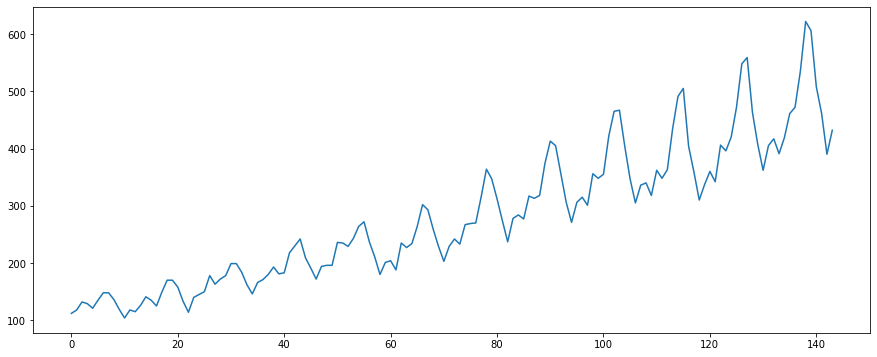

In [4]:
plt.plot(df.iloc[:,1])

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.iloc[:,1:])

In [7]:
df.shape

(144, 1)

In [8]:
##splitting dataset into train and test split
training_size=int(len(df)*0.80)

In [9]:
training_size

115

In [10]:
test_size=len(df)-training_size

In [11]:
test_size

29

In [12]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [13]:
test_data

array([[0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [14]:
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
X_train.shape, y_train.shape

((110, 4), (110,))

In [17]:
import numpy as np

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [18]:
X_train.shape

(110, 4, 1)

In [19]:
### Create the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 110 samples, validate on 24 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
110/110 [==============================] - 7s 66ms/sample - loss: 0.0195 - val_loss: 0.0306
Epoch 2/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0089 - val_loss: 0.0399
Epoch 3/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0085 - val_loss: 0.0281
Epoch 4/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0088 - val_loss: 0.0288
Epoch 5/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0075 - val_loss: 0.0393
Epoch 6/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0069 - val_loss: 0.0265
Epoch 7/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0074 - val_loss: 0.0259
Epoch 8/100
110

Epoch 72/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0027 - val_loss: 0.0080
Epoch 73/100
110/110 [==============================] - 1s 12ms/sample - loss: 0.0026 - val_loss: 0.0128
Epoch 74/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0026 - val_loss: 0.0062
Epoch 75/100
110/110 [==============================] - 1s 12ms/sample - loss: 0.0030 - val_loss: 0.0144
Epoch 76/100
110/110 [==============================] - 1s 12ms/sample - loss: 0.0024 - val_loss: 0.0085
Epoch 77/100
110/110 [==============================] - 1s 12ms/sample - loss: 0.0024 - val_loss: 0.0058
Epoch 78/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0025 - val_loss: 0.0075
Epoch 79/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0026 - val_loss: 0.0096
Epoch 80/100
110/110 [==============================] - 1s 11ms/sample - loss: 0.0024 - val_loss: 0.0081
Epoch 81/100
110/110 [==============================] -

In [23]:
### check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
test_predict

array([[0.37620702],
       [0.47131655],
       [0.4886087 ],
       [0.42313763],
       [0.61814535],
       [0.50405157],
       [0.5993141 ],
       [0.7021744 ],
       [0.8046433 ],
       [0.6854019 ],
       [0.4479681 ],
       [0.5033134 ],
       [0.46671504],
       [0.6109562 ],
       [0.57013816],
       [0.48592606],
       [0.60402596],
       [0.6737709 ],
       [0.62293494],
       [0.7836602 ],
       [0.8821808 ],
       [0.65541565],
       [0.4978463 ],
       [0.5920445 ]], dtype=float32)

In [25]:
## Transform back to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
test_predict

array([[298.87524],
       [348.14197],
       [357.0993 ],
       [323.1853 ],
       [424.1993 ],
       [365.09872],
       [414.4447 ],
       [467.72638],
       [520.8052 ],
       [459.0382 ],
       [336.0475 ],
       [364.71637],
       [345.7584 ],
       [420.4753 ],
       [399.33157],
       [355.7097 ],
       [416.88547],
       [453.01334],
       [426.6803 ],
       [509.93597],
       [560.96967],
       [443.5053 ],
       [361.8844 ],
       [410.67905]], dtype=float32)

In [27]:
y_train.shape,train_predict.shape,train_predict

((110,),
 (110, 1),
 array([[120.49272 ],
        [116.56009 ],
        [128.92162 ],
        [137.8685  ],
        [138.87685 ],
        [131.31227 ],
        [118.38069 ],
        [105.18877 ],
        [113.9373  ],
        [107.835144],
        [118.284454],
        [130.75237 ],
        [126.42994 ],
        [121.37777 ],
        [142.22755 ],
        [157.30751 ],
        [159.00046 ],
        [152.76303 ],
        [132.68939 ],
        [116.86562 ],
        [135.48895 ],
        [134.02829 ],
        [141.35587 ],
        [168.26715 ],
        [152.6593  ],
        [167.84212 ],
        [170.8561  ],
        [191.16373 ],
        [189.42917 ],
        [178.78812 ],
        [160.95432 ],
        [146.93953 ],
        [162.59161 ],
        [161.4929  ],
        [172.0946  ],
        [185.02116 ],
        [173.34547 ],
        [179.70076 ],
        [212.20903 ],
        [218.45766 ],
        [235.44086 ],
        [200.25032 ],
        [192.2501  ],
        [171.94183 ],
        [192

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

246.60888851436007

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

412.06943421327196

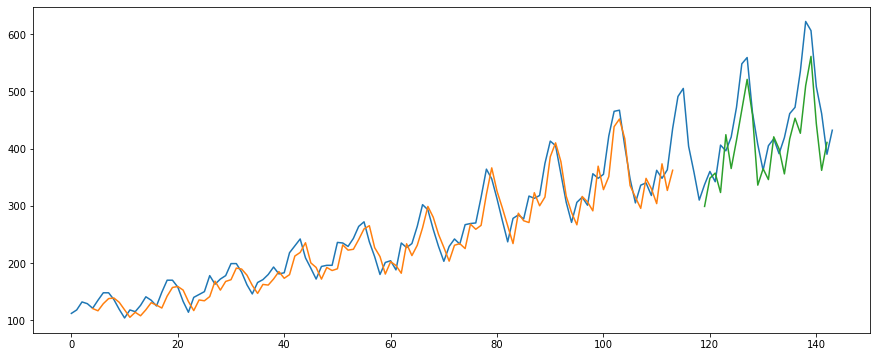

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()